# National Weather Service API Example
In this notebook, we will use the National Weather Service (NWS) Application Programming Interface (API) to get weather forecast data. We will then plot some charts to show the weather forecast for a given location. To plot the charts, we will use the `matplotlib` library.

You can read about the API web service here: [National Weather Service](https://www.weather.gov/documentation/services-web-api).

Getting weather data from the NWS is more complicated that a making single HTTP request. We first tell the `api.weather.gov` server where we are in terms of latitude and longitude. The response then allows use to get a forecast based on the nearest available weather station and its grid system for forecasting. The first response will tell us a grid point near to our location, which we can them use to get a forecast with a second HTTP request.

To get things started, we will import the libraries we will need.

In [1]:
# Import the libraries needed for this notebook.
# We will use matplotlib.pyplot for plotting graphs
# numpy is useful for manipulating arrays
# requests is for handling http requests 
import matplotlib.pyplot as plt
import numpy as np
import requests as r

In [2]:
# First we will do some set up for making the http request for a given location.

# Set the latitude and longitude of the location.
# (You can copy and paste the numbers after the equals sign into Google Maps to see the location)
lat, long = 39.7414, -105.0054 

# The URL for the request is below.
location_url = 'https://api.weather.gov/'+f"points/{lat},{long}"

# print the URL to make sure it looks ok.
print(location_url)

https://api.weather.gov/points/39.7414,-105.0054


In [3]:
# Now we will get data from the NWS website. We will make the request with the URL we created.
# The response will come back in JSON format. 

# Before we make the request, we need to set the user-agent in in request header.
# This is to prevent the website blocking our request, which can happen if there is no user-agent.
headers = {
    'User-Agent': 'Data Science 1001 Class'
}

# Make the http request
response = r.get(location_url, headers=headers)

# If all is well, the response code should be 200
print(response.status_code)

200


In [4]:
# The response is text in a JSON format, similar to a Python dictionary.
json_data = response.json()
print(json_data)

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 's': 'https://schema.org/', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#', 'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'}, 'city': 's:addressLocality', 'state': 's:addressRegion', 'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'}, 'bearing': {'@type': 's:QuantitativeValue'}, 'value': {'@id': 's:value'}, 'unitCode': {'@id': 's:unitCode', '@type': '@id'}, 'forecastOffice': {'@type': '@id'}, 'forecastGridData': {'@type': '@id'}, 'publicZone': {'@type': '@id'}, 'county': {'@type': '@id'}}], 'id': 'https://api.weather.gov/points/39.7414,-105.0054', 'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-105.0054, 39.7414]}, 'properties': {'@id': 'https://api.weather.gov/points/39.7414,-105.0054', '@type': 'wx:Point', 'cwa'

In [5]:
# Now let's just look at the keys
print(json_data.keys())

dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])


In [6]:
# We want to get the hourly forecast URL 
# This URL is located in a sub-dictionary reference through the 'properties' key.
# Let's first print the 'properties' dictionary
print(json_data['properties'])

{'@id': 'https://api.weather.gov/points/39.7414,-105.0054', '@type': 'wx:Point', 'cwa': 'BOU', 'type': 'land', 'forecastOffice': 'https://api.weather.gov/offices/BOU', 'gridId': 'BOU', 'gridX': 62, 'gridY': 62, 'forecast': 'https://api.weather.gov/gridpoints/BOU/62,62/forecast', 'forecastHourly': 'https://api.weather.gov/gridpoints/BOU/62,62/forecast/hourly', 'forecastGridData': 'https://api.weather.gov/gridpoints/BOU/62,62', 'observationStations': 'https://api.weather.gov/gridpoints/BOU/62,62/stations', 'relativeLocation': {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-105.062615, 39.75082]}, 'properties': {'city': 'Edgewater', 'state': 'CO', 'distance': {'unitCode': 'wmoUnit:m', 'value': 5002.5580438014}, 'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 102}}}, 'forecastZone': 'https://api.weather.gov/zones/forecast/COZ040', 'county': 'https://api.weather.gov/zones/county/COC031', 'fireWeatherZone': 'https://api.weather.gov/zones/fire/COZ240', 'timeZone'

In [7]:
# Now let's look at just the keys in the 'properties' dictionary.
# You should see a key called 'forecastHourly'.
print(json_data['properties'].keys())

dict_keys(['@id', '@type', 'cwa', 'type', 'forecastOffice', 'gridId', 'gridX', 'gridY', 'forecast', 'forecastHourly', 'forecastGridData', 'observationStations', 'relativeLocation', 'forecastZone', 'county', 'fireWeatherZone', 'timeZone', 'radarStation', 'astronomicalData', 'nwr'])


In [8]:
# The URL we want is the value that corresponds to the 'forecastHourly' key.
forecast_hourly_url = json_data['properties']['forecastHourly']
print(forecast_hourly_url)

https://api.weather.gov/gridpoints/BOU/62,62/forecast/hourly


In [9]:
# Now we will make another http request to get the forecast for the nearest station
forecast_request = r.get(forecast_hourly_url, headers=headers)
forecast_request.status_code

200

In [10]:
# The JSON response is another dictionary. Let's examine the keys
forecast_hourly = forecast_request.json()
print(forecast_hourly.keys())

dict_keys(['@context', 'type', 'geometry', 'properties'])


In [11]:
# The properties section of the dictionary contains a list of periods of one hour.
# Each period is a dictionary with weather information like temperature, dewpoint, etc.
period_list = forecast_hourly['properties']['periods']
print(period_list[0].keys())

dict_keys(['number', 'name', 'startTime', 'endTime', 'isDaytime', 'temperature', 'temperatureUnit', 'temperatureTrend', 'probabilityOfPrecipitation', 'dewpoint', 'relativeHumidity', 'windSpeed', 'windDirection', 'icon', 'shortForecast', 'detailedForecast'])


In [12]:
# Grab the start time for the first period
start_time = period_list[0]['startTime']

# Now we can build a list of hourly temperatures starting from  'startTime'.
y=[]
for item in period_list:
    y.append(item['temperature'])
print(y)

[48, 55, 61, 67, 69, 70, 70, 70, 69, 67, 64, 60, 57, 54, 52, 51, 50, 48, 47, 46, 45, 45, 43, 44, 47, 55, 61, 65, 68, 69, 69, 69, 68, 65, 62, 58, 55, 52, 49, 46, 45, 43, 42, 40, 38, 37, 38, 39, 42, 47, 53, 57, 61, 63, 64, 64, 63, 61, 58, 55, 51, 48, 45, 43, 42, 40, 39, 38, 37, 37, 37, 39, 42, 48, 55, 61, 65, 66, 67, 67, 66, 64, 60, 56, 53, 50, 48, 46, 44, 42, 41, 40, 40, 40, 40, 41, 44, 50, 56, 62, 65, 67, 67, 67, 67, 65, 61, 57, 52, 49, 46, 44, 41, 39, 37, 36, 35, 35, 35, 37, 40, 46, 54, 60, 63, 65, 66, 67, 66, 65, 62, 59, 55, 52, 50, 48, 46, 44, 42, 40, 39, 39, 39, 40, 42, 46, 51, 55, 58, 60, 61, 61, 61, 59, 56, 53]


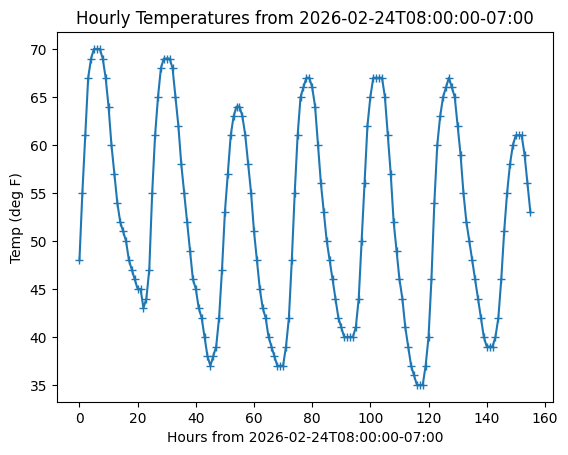

In [13]:
# Now we can plot our graph of hourly temperatures from startTime
plt.title("Hourly Temperatures from "+start_time)
plt.xlabel("Hours from "+start_time)
plt.ylabel("Temp (deg F)")
plt.plot(y, marker='+')
plt.show()

## Exercise 1

Use the same data to create a graph showing the forecast relative humidity for the same time period.

Note: You may need to include an if statement like the one below to deal with cases where no data has been returned.
```
    if item['relativeHumidity'] is not None:
        rel_hum.append(item['relativeHumidity']['value'])
```

[19, 15, 13, 10, 11, 12, 13, 15, 18, 19, 22, 25, 30, 34, 37, 41, 43, 48, 50, 52, 55, 58, 62, 59, 55, 42, 34, 27, 24, 23, 22, 20, 21, 24, 26, 31, 36, 40, 42, 46, 50, 52, 55, 55, 54, 52, 51, 47, 42, 34, 25, 19, 16, 14, 14, 14, 15, 16, 19, 21, 26, 29, 32, 35, 36, 39, 40, 42, 42, 42, 42, 39, 34, 26, 19, 15, 12, 11, 11, 12, 13, 14, 17, 20, 23, 25, 29, 31, 33, 38, 39, 41, 42, 42, 42, 41, 36, 29, 24, 20, 17, 16, 15, 15, 16, 18, 21, 25, 32, 36, 40, 43, 48, 52, 56, 59, 64, 64, 64, 59, 52, 43, 32, 27, 24, 22, 21, 20, 21, 22, 25, 29, 35, 41, 44, 47, 51, 55, 60, 64, 67, 67, 67, 67, 62, 53, 42, 37, 33, 29, 28, 28, 28, 32, 37, 41]


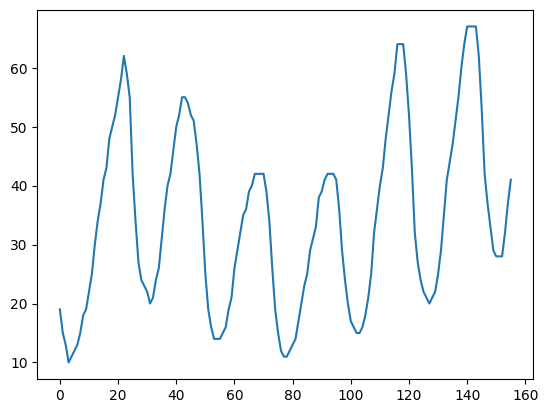

In [14]:
# Type your code here
rel_hum = []
for item in period_list:
    if item['relativeHumidity'] is not None:
        rel_hum.append(item['relativeHumidity']['value'])
print(rel_hum)

plt.plot(rel_hum)
plt.show()

## Exercise 2

Create a vertical bar chart given the probability of precipitation for the next few days.

[0, 0, 0, 0, 1, 1, 1, 1, 1, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 41, 41, 41, 41, 41, 41, 20, 20, 20, 20, 20, 20, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 21, 21, 21, 21, 21, 21, 34, 34, 34, 34, 34, 34, 30, 30, 30, 30, 30, 30, 24, 24, 24, 24, 24, 24, 32, 32, 32, 32, 32, 32, 32, 32, 32]


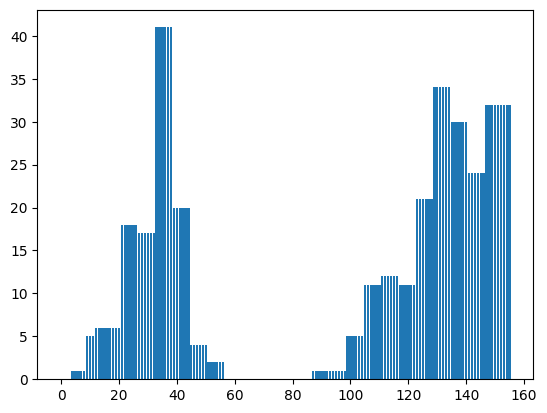

In [15]:
# Type your code here

precip = []
for item in period_list:
    precip.append(item['probabilityOfPrecipitation']['value'])
print(precip)
x = range(156)
plt.bar(x, precip)
plt.show()

## Exercise 3
Find a forecast for a different Colorado location. Use this forecast to create a graph of projected wind speeds by hour, for your location. Compare this to the data for the first location - for example by plotting both on the same graph.

Note: You will need to do a bit of data processing to convert the wind speed strings into numbers. Here is a hint:
```
for item in period_list:
    windspeed = float(item['wind speed'].split(' ')[0])
    ...
```

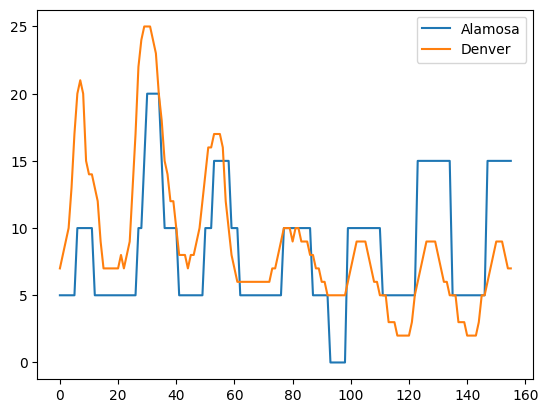

In [16]:
# Type your code here
# These coords are for Alamosa, CO
lat, long = 37.4694, -105.87
location_url = 'https://api.weather.gov/'+f"points/{lat},{long}"

# Make HTTP request
headers = {
    'User-Agent': 'Data Science 1001 Class'
}
response = r.get(location_url, headers=headers)
json_data = response.json()
forecastURL = json_data['properties']['forecastHourly']
al_forecast_request = r.get(forecastURL, headers=headers)
al_forecast = al_forecast_request.json()
al_periods = al_forecast['properties']['periods']
al_wind = []
for item in al_periods:
    if item['windSpeed'] is not None:
        al_wind.append(float(item['windSpeed'].split(' ')[0]))
den_wind = []
for item in period_list:
    if item['windSpeed'] is not None:
        den_wind.append(float(item['windSpeed'].split(' ')[0]))
plt.plot(al_wind, label='Alamosa')
plt.plot(den_wind, label='Denver')
plt.legend()
plt.show()